In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
weather = pd.read_csv("WeatherForecasting.csv", index_col="location1")
weather.index.names = ['Time']
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location114,location115,location116,location117,location118,location119,location120,location121,location122,location123
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,54.680,55.004,55.040,NaN,51.332,52.169,52.070,51.980,53.978,NaN
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,NaN,NaN,46.427,NaN,49.928,51.584,49.775,NaN,50.702,NaN
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,49.487,50.423,50.927,NaN,50.288,50.531,50.657,51.566,50.441,NaN
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,47.516,48.911,49.406,NaN,50.099,48.551,49.154,50.180,49.721,NaN
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,46.202,47.435,48.191,NaN,49.910,47.264,47.642,48.992,49.406,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,NaN,70.781,78.224,NaN,...,86.477,83.921,103.901,NaN,88.331,77.684,74.993,83.084,96.782,NaN
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,60.386,61.790,63.905,NaN,85.262,NaN,NaN,67.523,92.390,NaN
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,87.638,89.726,86.747,NaN,NaN,92.399,NaN,NaN,NaN,NaN


In [2]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

location2      0.447318
location3      0.446839
location4      0.443966
location5      0.446360
location6      0.450192
                 ...   
location119    0.474617
location120    0.464559
location121    0.457854
location122    0.476533
location123    1.000000
Length: 122, dtype: float64

In [3]:
valid_columns = weather.columns[null_pct < .5]
valid_columns

Index(['location2', 'location3', 'location4', 'location5', 'location6',
       'location7', 'location8', 'location9', 'location10', 'location11',
       ...
       'location110', 'location113', 'location114', 'location115',
       'location116', 'location118', 'location119', 'location120',
       'location121', 'location122'],
      dtype='object', length=115)

In [4]:
weather = weather[valid_columns].copy()

In [5]:
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location110,location113,location114,location115,location116,location118,location119,location120,location121,location122
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,52.547,53.384,54.680,55.004,55.040,51.332,52.169,52.070,51.980,53.978
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,50.378,45.419,NaN,NaN,46.427,49.928,51.584,49.775,NaN,50.702
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,49.775,48.299,49.487,50.423,50.927,50.288,50.531,50.657,51.566,50.441
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,49.559,46.922,47.516,48.911,49.406,50.099,48.551,49.154,50.180,49.721
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,49.001,45.635,46.202,47.435,48.191,49.910,47.264,47.642,48.992,49.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,NaN,70.781,78.224,NaN,...,97.493,90.788,86.477,83.921,103.901,88.331,77.684,74.993,83.084,96.782
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,90.464,NaN,60.386,61.790,63.905,85.262,NaN,NaN,67.523,92.390
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,79.151,77.774,87.638,89.726,86.747,NaN,92.399,NaN,NaN,NaN


In [6]:
weather = weather.ffill()

In [7]:
weather

,location2,location3,location4,location5,location6,location7,location8,location9,location10,location11,...,location110,location113,location114,location115,location116,location118,location119,location120,location121,location122
Time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:01:00,57.164,56.732,57.047,58.181,57.236,57.218,57.191,54.626,53.519,57.947,...,52.547,53.384,54.680,55.004,55.040,51.332,52.169,52.070,51.980,53.978
2022-05-01 01:01:00,55.058,53.906,54.086,55.769,54.455,54.473,54.212,52.097,51.971,56.327,...,50.378,45.419,54.680,55.004,46.427,49.928,51.584,49.775,51.980,50.702
2022-05-01 02:01:00,51.485,50.567,51.458,52.430,51.062,52.007,51.836,49.946,50.279,53.015,...,49.775,48.299,49.487,50.423,50.927,50.288,50.531,50.657,51.566,50.441
2022-05-01 03:01:00,52.196,50.513,50.720,53.069,51.755,51.593,51.242,49.649,50.513,53.951,...,49.559,46.922,47.516,48.911,49.406,50.099,48.551,49.154,50.180,49.721
2022-05-01 04:01:00,51.521,49.235,49.739,52.043,50.675,50.513,50.045,48.875,50.027,52.916,...,49.001,45.635,46.202,47.435,48.191,49.910,47.264,47.642,48.992,49.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 19:01:00,94.217,95.585,85.469,90.689,89.537,69.494,103.370,70.781,78.224,78.980,...,97.493,90.788,86.477,83.921,103.901,88.331,77.684,74.993,83.084,96.782
2022-07-26 20:01:00,96.476,107.933,81.914,100.526,104.702,86.999,66.137,69.179,72.968,101.570,...,90.464,90.788,60.386,61.790,63.905,85.262,77.684,74.993,67.523,92.390
2022-07-26 21:01:00,97.232,101.381,97.358,92.948,96.593,92.471,93.425,85.721,84.218,89.087,...,79.151,77.774,87.638,89.726,86.747,85.262,92.399,74.993,67.523,92.390


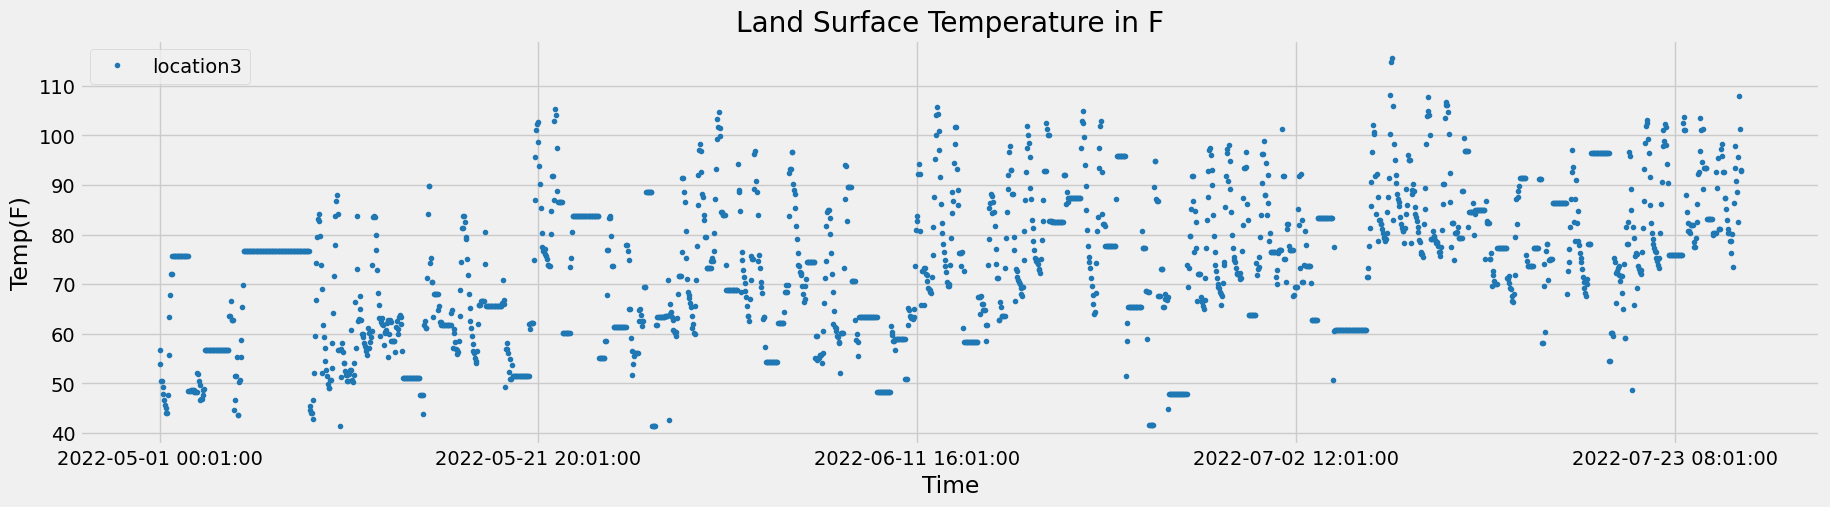

In [8]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
#matplotlib plot
i=3 #specify which location to plot
weather.plot(y=(f'location{i}'),
        style='.',
        figsize=(20, 5),
        color=color_pal[0],
        title='Land Surface Temperature in F',
        xlabel='Time',
        ylabel= 'Temp(F)')
plt.legend(loc='upper left')
plt.show()

In [9]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2022-05-01 00:01:00', '2022-05-01 01:01:00',
               '2022-05-01 02:01:00', '2022-05-01 03:01:00',
               '2022-05-01 04:01:00', '2022-05-01 05:01:00',
               '2022-05-01 06:01:00', '2022-05-01 07:01:00',
               '2022-05-01 08:01:00', '2022-05-01 09:01:00',
               ...
               '2022-07-26 14:01:00', '2022-07-26 15:01:00',
               '2022-07-26 16:01:00', '2022-07-26 17:01:00',
               '2022-07-26 18:01:00', '2022-07-26 19:01:00',
               '2022-07-26 20:01:00', '2022-07-26 21:01:00',
               '2022-07-26 22:01:00', '2022-07-26 23:01:00'],
              dtype='datetime64[ns]', name='Time', length=2088, freq=None)

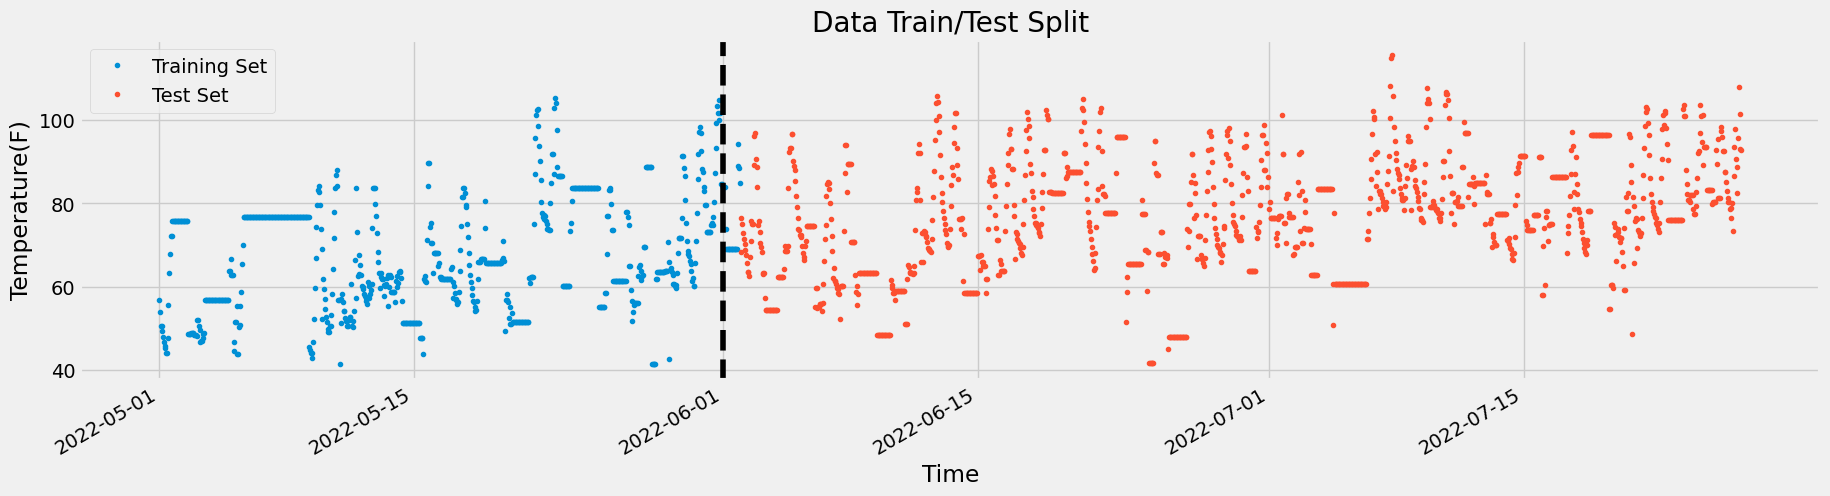

In [10]:
#Train/Test Split
#1 week split
train = weather.loc[weather.index < '2022-06-01 23:01:00']
test = weather.loc[weather.index >= '2022-06-01 23:01:00']

fig, ax = plt.subplots(figsize=(20, 5))
train.plot(ax=ax, style='.',y=(f'location{i}'), label='Training Set', title='Data Train/Test Split', ylabel='Temperature(F)')
test.plot(ax=ax, style='.',y=(f'location{i}'), label='Test Set', ylabel='Temperature(F)')
ax.axvline('2022-06-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [11]:
#creating features to study relationships
def create_features(weather):
    """
    Create time series features based on time series index.
    """
    weather = weather.copy()
    weather['hour'] = weather.index.hour
    weather['dayofweek'] = weather.index.dayofweek
    weather['quarter'] = weather.index.quarter
    weather['month'] = weather.index.month
    weather['year'] = weather.index.year
    weather['dayofyear'] = weather.index.dayofyear
    weather['dayofmonth'] = weather.index.day
    weather['weekofyear'] = weather.index.isocalendar().week
    return weather

weather = create_features(weather)

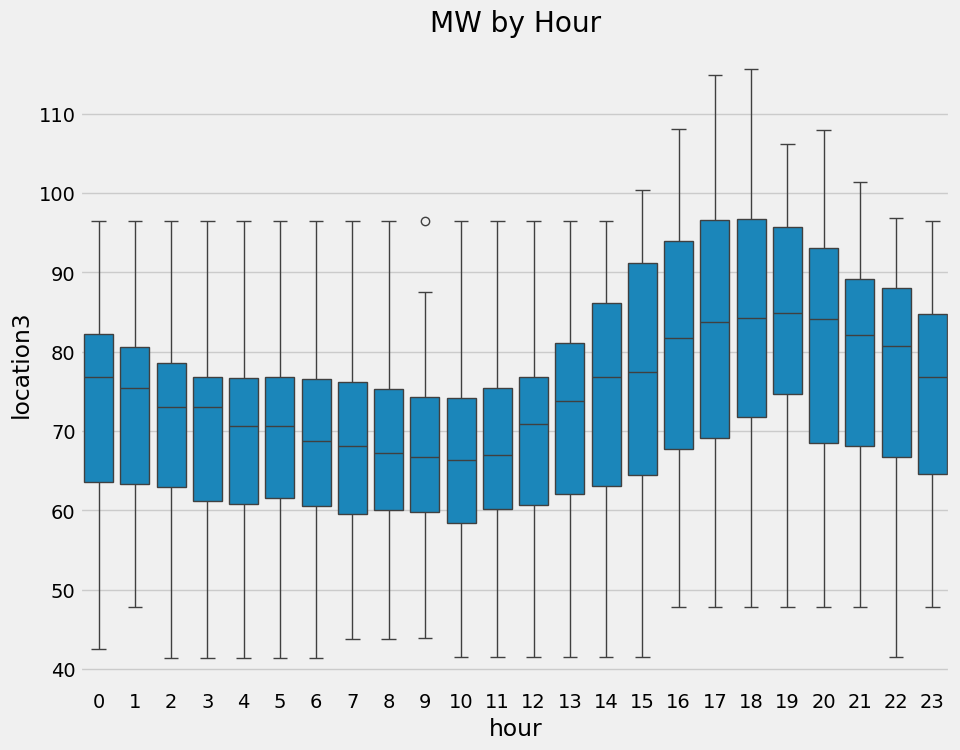

In [12]:
#comparing temperature by hour #edit datetime so that it differentiates between 12am and 12pm!!!!
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=weather, x='hour', y=(f'location{i}'))
ax.set_title('MW by Hour')
plt.show()

In [13]:
#create our model
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = (f'location{i}')

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [14]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:67.21025	validation_1-rmse:76.79985
[100]	validation_0-rmse:26.44229	validation_1-rmse:33.36325


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [10:58:08] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:12.64666	validation_1-rmse:18.33324
[300]	validation_0-rmse:8.85723	validation_1-rmse:14.10738
[400]	validation_0-rmse:7.87229	validation_1-rmse:13.12886
[500]	validation_0-rmse:7.51056	validation_1-rmse:12.81312
[600]	validation_0-rmse:7.25239	validation_1-rmse:12.69794
[661]	validation_0-rmse:7.07215	validation_1-rmse:12.70416


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

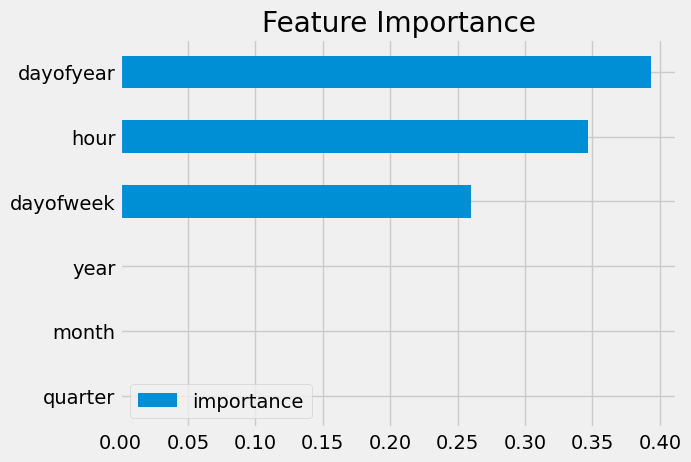

In [15]:
#feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [16]:
#results
test['prediction'] = reg.predict(X_test)
reg.predict(X_test)
df = pd.DataFrame(reg.predict(X_test), columns =['Predictions'], index=X_test.index)
test['actual'] = y_test
combined = pd.concat([df, y_test],axis=1)
combined.columns = ["Prediction", "Actual"]
combined["Diff"] = (combined["Prediction"] - combined["Actual"]).abs()
combined

,Prediction,Actual,Diff
Time,,,
2022-06-01 23:01:00,78.616158,68.351,10.265158
2022-06-02 00:01:00,74.651703,76.451,1.799297
2022-06-02 01:01:00,74.651703,74.975,0.323297
2022-06-02 02:01:00,71.127953,72.941,1.813047
2022-06-02 03:01:00,67.496864,71.375,3.878136
...,...,...,...
2022-07-26 19:01:00,87.286995,95.585,8.298005
2022-07-26 20:01:00,87.286995,107.933,20.646005
2022-07-26 21:01:00,85.154106,101.381,16.226894


In [17]:
minvalue = combined['Diff'].min() 
minvalue

0.037894348144533296

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(combined["Actual"], combined["Prediction"]) #the avg of the difference
# df2 = combined["diff"].mean() #same as above

10.356524812061618

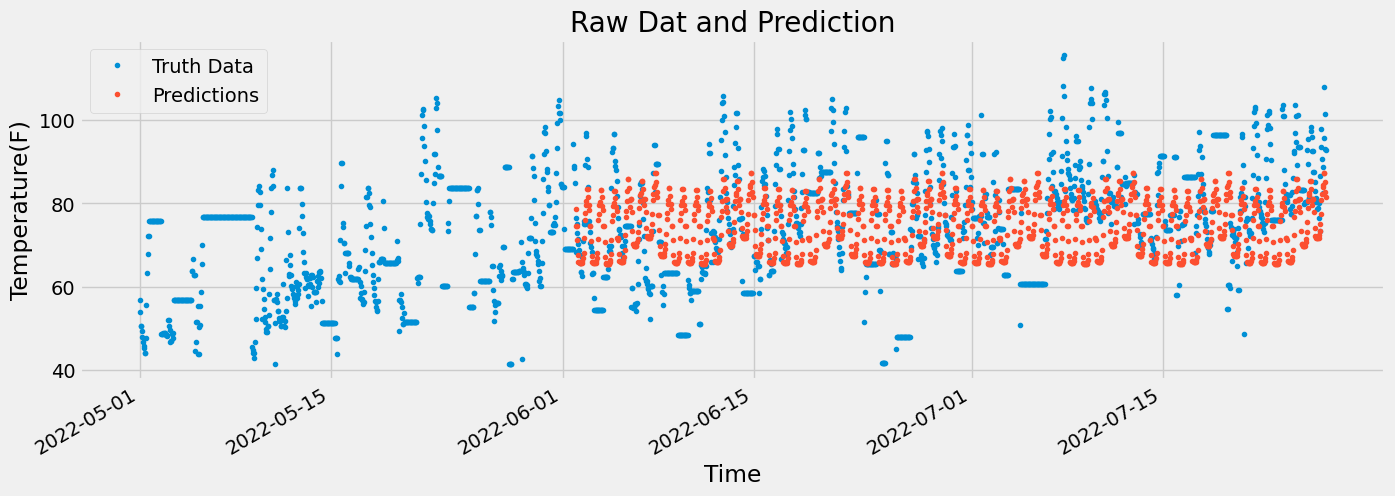

In [19]:
#comparing test and predictions
test['prediction'] = reg.predict(X_test)
ax = weather[[f'location{i}']].plot(figsize=(15, 5),style='.', ylabel='Temperature(F)')
weather = weather.merge(test[['prediction']], how='left', left_index=True, right_index=True)
weather['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

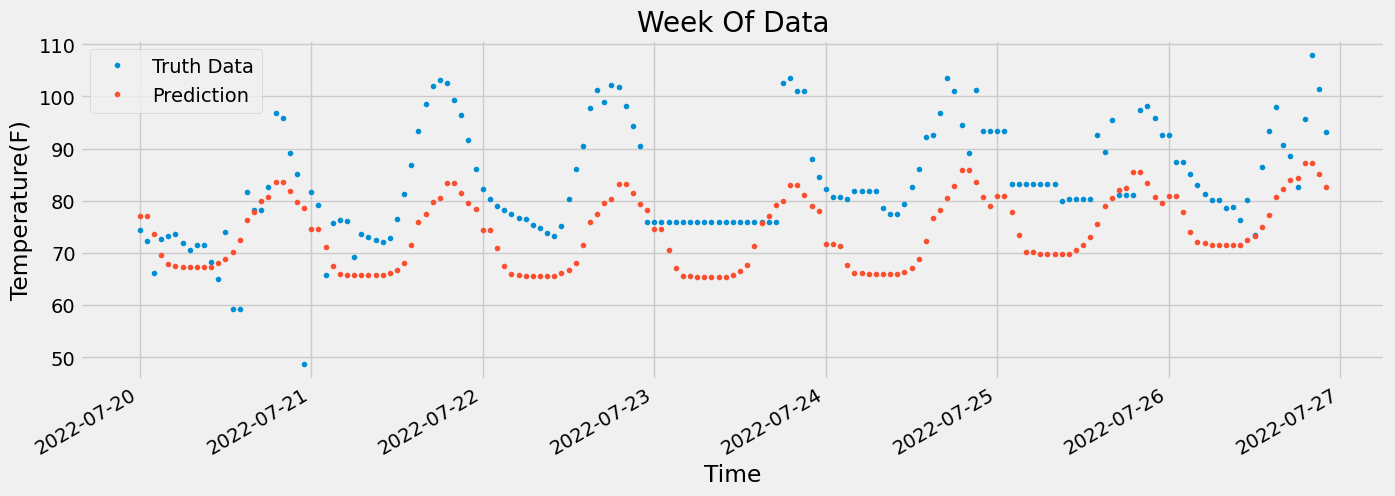

In [20]:
#Week of Data
ax = weather.loc[(weather.index > '2022-07-19 23:01:00') & (weather.index < '2022-07-26 23:01:00')][f'location{i}'] \
    .plot(figsize=(15, 5), title='Week Of Data', style='.')
weather.loc[(weather.index > '2022-07-19 23:01:00') & (weather.index < '2022-07-26 23:01:00')]['prediction'] \
    .plot(style='.', ylabel='Temperature(F)')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [21]:
# #calculated error
# test['error'] = np.abs(test[TARGET] - test['prediction'])
# test['date'] = test.index.date
# test.groupby(['date'])['error'].mean().sort_values(ascending=False)

In [22]:
weather.index.max()

Timestamp('2022-07-26 23:01:00')

In [23]:
#Create future dataframe
future = pd.date_range('2022-07-26','2022-07-28', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)

In [24]:
future_w_features = df_and_future.query('isFuture').copy()

In [25]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

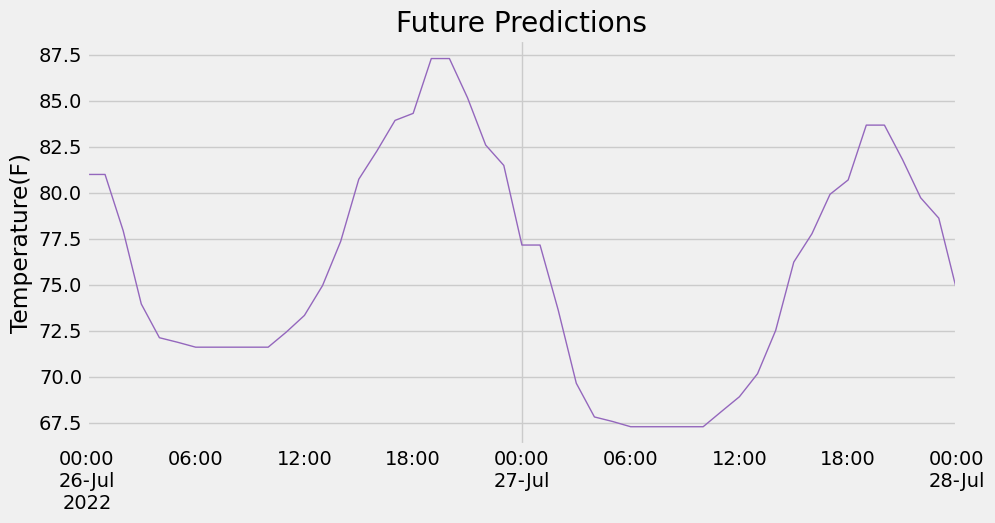

In [26]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions',
                              ylabel='Temperature(F)')
#It would be nice to add a hover tool to show the value 
# import mplcursors
# mplcursors.cursor(hover=True)
plt.show()

In [27]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])
future_values = pd.DataFrame(reg.predict(future_w_features[FEATURES]), columns =['Predictions'], index=future)
future_values.head(12)

,Predictions
2022-07-26 00:00:00,80.990891
2022-07-26 01:00:00,80.990891
2022-07-26 02:00:00,77.936264
2022-07-26 03:00:00,73.952408
2022-07-26 04:00:00,72.121414
2022-07-26 05:00:00,71.875565
2022-07-26 06:00:00,71.607559
2022-07-26 07:00:00,71.607559
2022-07-26 08:00:00,71.607559
2022-07-26 09:00:00,71.607559
